In [9]:
import fastf1 as ff1
import numpy as np
import matplotlib as mpl

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

In [10]:
pd.options.mode.chained_assignment = None

In [11]:
session = ff1.get_session(2022, 'Brazil', 'Q')
session.load()

core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['20', '1', '63', '4', '55', '31', '14', '44', '11', '16', '23', '10', '5', '3', '6', '24', '77', '22', '47', '18']


In [12]:
lap = session.laps.pick_driver('MAG').pick_fastest()

x = lap.telemetry['X']
y = lap.telemetry['Y']
color = lap.telemetry['Speed']

In [14]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

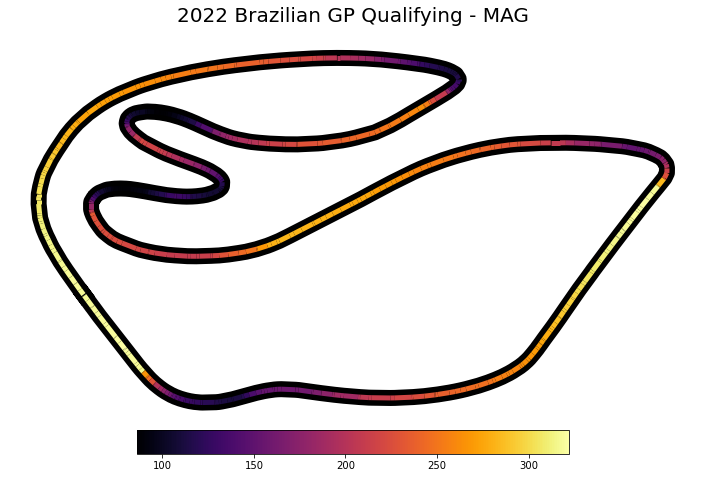

In [19]:
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle('2022 Brazilian GP Qualifying - MAG', size=20, y=0.97)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap='inferno', norm=norm, linestyle='-', linewidth=5)

lc.set_array(color)

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap='inferno', orientation="horizontal")

plt.show()

In [20]:
fig.savefig('Magnussen Speed Heatmap.png', dpi = 300)